## Project 4 - Continuous Target Prediction Using Regression in Titanic data
#### Author: Mahesh Bashyal
#### Date: November 14, 2025

### Introduction: In this project we will use regression in order to predict a continuous numeric target. In other words, we will be predicting the fare of the Titanic using different features that are provided in this Titanic dataset.

In [17]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


### Section 1. Import and Inspect the Data

In [ ]:

# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Section 2. Data Exploration and Preparation

In [19]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

titanic = titanic.dropna(subset=['fare'])

titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1


/var/folders/5k/fwq15zcn2dl48y9txqlt51fc0000gn/T/ipykernel_27205/1354486036.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


### Section 3. Feature Selection and Justification

In [20]:
# Case 1. age
X1 = titanic[['age']]
y1 = titanic['fare']

In [21]:
# Case 2. family_size
X2 = titanic[['family_size']]
y2 = titanic['fare']


In [22]:
# Case 3. age, family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']


In [23]:
# Case 4. class
X4 = titanic[['pclass']]
y4 = titanic['fare']

### Reflection Questions - answer these in your notebook (in a Markdown cell):

#### Why might these features affect a passenger’s fare: The features such as age, family size affect a passenger's fare because the fare will depend upon how many children are there in the family, how large the family is etc. Similalry, I selected class because the fare will be definitely affected by what class of tickets they bought.

#### List all available features: survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone

#### Which other features could improve predictions and why Probably deck could improve predictions because probabluy lower deck will be cheaper than upper decks.  

#### How many variables are in your Case 4: one

#### Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs: I chose 'pclass' variable for Case 4 because it is likely that the fare price largely depended upon what class you seats you have.

## Section 4. Train a Regression Model (Linear Regression)

### 4.1 Split the data

In [24]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

## 4.2 Train and Evaluate Linear Regression Models (all 4 cases)

### We'll use a more concise approach - create each model and immediately call the fit() method. 

In [25]:
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions

y1_pred_train = lr_model1.predict(X1_train)
y1_pred_test = lr_model1.predict(X1_test)

y2_pred_train = lr_model2.predict(X2_train)
y2_pred_test = lr_model2.predict(X2_test)

y3_pred_train = lr_model3.predict(X3_train)
y3_pred_test = lr_model3.predict(X3_test)

y4_pred_train = lr_model4.predict(X4_train)
y4_pred_test = lr_model4.predict(X4_test)

## 4.3 Report Performance

In [30]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# --- Ensure all y arrays are 1-D ---
y1_train = np.ravel(y1_train)
y1_test = np.ravel(y1_test)
y1_pred_train = np.ravel(y1_pred_train)
y1_pred_test = np.ravel(y1_pred_test)

y2_train = np.ravel(y2_train)
y2_test = np.ravel(y2_test)
y2_pred_train = np.ravel(y2_pred_train)
y2_pred_test = np.ravel(y2_pred_test)

y3_train = np.ravel(y3_train)
y3_test = np.ravel(y3_test)
y3_pred_train = np.ravel(y3_pred_train)
y3_pred_test = np.ravel(y3_pred_test)

y4_train = np.ravel(y4_train)
y4_test = np.ravel(y4_test)
y4_pred_train = np.ravel(y4_pred_train)
y4_pred_test = np.ravel(y4_pred_test)

# --- Case 1 ---
print("Case 1: Training R²:", r2_score(y1_train, y1_pred_train))
print("Case 1: Test R²:", r2_score(y1_test, y1_pred_test))
print("Case 1: Test RMSE:", np.sqrt(mean_squared_error(y1_test, y1_pred_test)))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y1_pred_test))

# --- Case 2 ---
print("Case 2: Training R²:", r2_score(y2_train, y2_pred_train))
print("Case 2: Test R²:", r2_score(y2_test, y2_pred_test))
print("Case 2: Test RMSE:", np.sqrt(mean_squared_error(y2_test, y2_pred_test)))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y2_pred_test))

# --- Case 3 ---
print("Case 3: Training R²:", r2_score(y3_train, y3_pred_train))
print("Case 3: Test R²:", r2_score(y3_test, y3_pred_test))
print("Case 3: Test RMSE:", np.sqrt(mean_squared_error(y3_test, y3_pred_test)))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y3_pred_test))

# --- Case 4 ---
print("Case 4: Training R²:", r2_score(y4_train, y4_pred_train))
print("Case 4: Test R²:", r2_score(y4_test, y4_pred_test))
print("Case 4: Test RMSE:", np.sqrt(mean_squared_error(y4_test, y4_pred_test)))
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y4_pred_test))


Case 1: Training R²: 0.009950688019452203
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 37.97164180172938
Case 1: Test MAE: 25.28637293162364
Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 37.6114940041967
Case 2: Test MAE: 25.025348159416414
Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 37.0777586646559
Case 3: Test MAE: 24.284935030470688
Case 4: Training R²: 0.3005588037487473
Case 4: Test R²: 0.3016017234169923
Case 4: Test RMSE: 31.7873316928033
Case 4: Test MAE: 20.653703671484056


## Section 4 Reflection Questions - answer these in your notebook (in a Markdown cell)
#### Compare the train vs test results for each.

#### Did Case 1 overfit or underfit? Explain: Case 1 underfit the data because here R squared is close to zero.
#### Did Case 2 overfit or underfit? Explain: Underfitted similar to case 1
#### Did Case 3 overfit or underfit? Explain: Underfitted similar to case 1 and 2
#### Did Case 4 overfit or underfit? Explain: It looks somewhat in the middle, the R squared is improved here.
#### Adding Age

#### Did adding age improve the model: It improved the model slightly but not a lot. 
#### Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that): If a family has more number of children it is likely that children will get some type of discounted rate and it may affect the total fare. 
#### Worst

#### Which case performed the worst:Case 1 
#### How do you know: In Case 1 we see the least values of R squared for training and test data which means that very small variation in fare is explained by the feature age.
#### Do you think adding more training data would improve it (and why/why not): 
#### Best

#### Which case performed the best: Case 4 performed the best
#### How do you know: The R squared value was the highest. 
#### Do you think adding more training data would improve it (and why/why not): Adding additional training data would certainly help to improve the model. 
 

## Section 5. Compare Alternative Models

### Choose Best case to continue
### If I had to choose between the models that I compared I would choose model 4. 

### 5.1 Ridge Regression (L2 Penalty)
#### Ridge Regression is a regularized version of linear regression that adds a penalty to large coefficient values. It uses the L2 penalty, which adds the sum of squared coefficients to the loss function.

#### This "shrinks" the coefficients, reducing the model’s sensitivity to any one feature while still keeping all features in the model.

#### Penalty term: L2 = sum of squared weights
#### Effect: Shrinks weights, helps reduce overfitting, keeps all features

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)

y_pred_ridge = ridge_model.predict(X4_test)

# Convert to 1-D (prevents errors)
y4_test_flat = np.ravel(y4_test)
y_pred_ridge_flat = np.ravel(y_pred_ridge)

print("Ridge Regression R²:", r2_score(y4_test_flat, y_pred_ridge_flat))
print("Ridge Regression RMSE:", np.sqrt(mean_squared_error(y4_test_flat, y_pred_ridge_flat)))
print("Ridge Regression MAE:", mean_absolute_error(y4_test_flat, y_pred_ridge_flat))


Ridge Regression R²: 0.3022471559791463
Ridge Regression RMSE: 31.772639988961412
Ridge Regression MAE: 20.642499405545284


### 5.2 Elastic Net (L1 + L2 combined)

In [35]:
# Case 4 (pClass)
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)

y_pred_elastic = elastic_model.predict(X4_test)

# Flatten arrays (prevents RMSE errors)
y4_test_flat = np.ravel(y4_test)
y_pred_elastic_flat = np.ravel(y_pred_elastic)

print("ElasticNet (Case 4) R²:", r2_score(y4_test_flat, y_pred_elastic_flat))
print("ElasticNet (Case 4) RMSE:", np.sqrt(mean_squared_error(y4_test_flat, y_pred_elastic_flat)))
print("ElasticNet (Case 4) MAE:", mean_absolute_error(y4_test_flat, y_pred_elastic_flat))




ElasticNet (Case 4) R²: 0.3390195349445042
ElasticNet (Case 4) RMSE: 30.924081298775288
ElasticNet (Case 4) MAE: 19.925521818892264


### 5.3 Polynomial Regression

In [38]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X4_train_poly = poly.fit_transform(X4_train)
X4_test_poly = poly.transform(X4_test)

In [41]:

# Fit Linear Regression on polynomial features
poly_model = LinearRegression()
poly_model.fit(X4_train_poly, y4_train)
y_pred_poly = poly_model.predict(X4_test_poly)

# Flatten arrays in case they are not 1-D
y4_test_flat = np.ravel(y4_test)
y_pred_poly_flat = np.ravel(y_pred_poly)

# Display metrics
print("Polynomial Regression (Case 4) R²:", r2_score(y4_test_flat, y_pred_poly_flat))
print("Polynomial Regression (Case 4) RMSE:", np.sqrt(mean_squared_error(y4_test_flat, y_pred_poly_flat)))
print("Polynomial Regression (Case 4) MAE:", mean_absolute_error(y4_test_flat, y_pred_poly_flat))

 

Polynomial Regression (Case 4) R²: 0.33610336564094034
Polynomial Regression (Case 4) RMSE: 30.992222956832556
Polynomial Regression (Case 4) MAE: 19.248370731275482


### 5.4 Visualize Polynomial Cubic Fit (for 1 input feature)


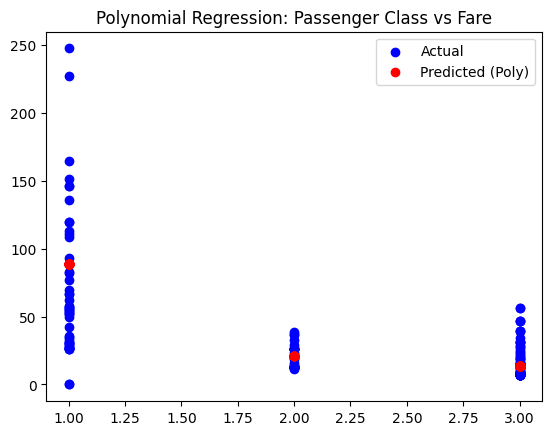

In [43]:
plt.scatter(X4_test, y4_test, color='blue', label='Actual')
plt.scatter(X4_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Passenger Class vs Fare")
plt.show()

### 5.4 Reflections (in a Markdown cell):

#### 1. What patterns does the cubic model seem to capture: This model shows that the fare is higher for Class 1 and get lower for Class 2 and Class 3
#### 2. Where does it perform well or poorly: It does a good job
#### 3. Did the polynomial fit outperform linear regression: Yes it does
#### 4. Where (on the graph or among which kinds of data points) does it fit best: It fits best whenever there is less variation and the data seems to be concentrated. 

### 5.4 Compare All Models

In [46]:


def report(name, y_true, y_pred):
    y_true = np.ravel(y_true)
    y_pred = np.ravel(y_pred)
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{name} RMSE: {rmse:.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear", y4_test, y4_pred_test)
report("Ridge", y4_test, y_pred_ridge)
report("ElasticNet", y4_test, y_pred_elastic)
report("Polynomial", y4_test, y_pred_poly)


Linear R²: 0.302
Linear RMSE: 31.79
Linear MAE: 20.65

Ridge R²: 0.302
Ridge RMSE: 31.77
Ridge MAE: 20.64

ElasticNet R²: 0.339
ElasticNet RMSE: 30.92
ElasticNet MAE: 19.93

Polynomial R²: 0.336
Polynomial RMSE: 30.99
Polynomial MAE: 19.25



### 5.5 Visualize Higher Odrer Polynomial (for the same 1 input case)

Polynomial Regression (degree 6) R²: 0.3361033656409331
Polynomial Regression (degree 6) RMSE: 30.992222956832723
Polynomial Regression (degree 6) MAE: 19.24837073127553


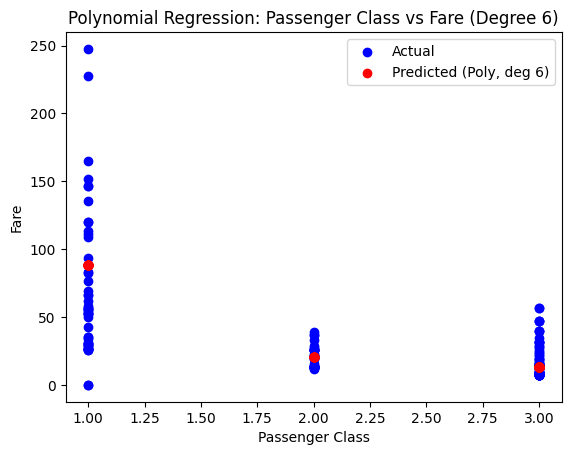

In [49]:

poly = PolynomialFeatures(degree=6)
X4_train_poly = poly.fit_transform(X4_train)
X4_test_poly = poly.transform(X4_test)
poly_model = LinearRegression()
poly_model.fit(X4_train_poly, y4_train)
y_pred_poly6 = poly_model.predict(X4_test_poly)
y4_test_flat = np.ravel(y4_test)
y_pred_poly6_flat = np.ravel(y_pred_poly6)

print("Polynomial Regression (degree 6) R²:", r2_score(y4_test_flat, y_pred_poly6_flat))
print("Polynomial Regression (degree 6) RMSE:", np.sqrt(mean_squared_error(y4_test_flat, y_pred_poly6_flat)))
print("Polynomial Regression (degree 6) MAE:", mean_absolute_error(y4_test_flat, y_pred_poly6_flat))

plt.scatter(X4_test, y4_test, color='blue', label='Actual')
plt.scatter(X4_test, y_pred_poly6_flat, color='red', label='Predicted (Poly, deg 6)')
plt.legend()
plt.title("Polynomial Regression: Passenger Class vs Fare (Degree 6)")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()


#### Comparison of the polynomial 3rd order and 6th order
#### The results were similar when comparing the metrics such as R2, RMSE and MAE


## Section 6. Final Thoughts and Insights

### 6.1 Summarize Findings

#### What features were most useful? We compared different features such as age, family size, age + family size and pclass to predict the fare. I found out the pClass was the best predictor for fate. 

#### What regression model performed best? Based on R2 and other metrics, Elastic Net and Poynomial regression seem to do a better job than regular regression. 

#### How did model complexity or regularization affect results? I noticed that initially the R squared values for Case 1 (age), family size, age + family size were very low, but for our fourth case (pClass), the R squared value was much better. This also helped with the underfitting which was observed in those initial cases. This tells us that it is very important to explore which feature works best as a predictor by using these metrics to improve the model. When I used the Elastic Net and Ridge models for pClass feature,slight improvmeent in R squared values were observed indicating better prediction than the linear models. 

## 6.2 Discuss Challenges

#### What features were most useful? pClass was the most useful feature

#### What regression model performed best? Elastic Net and Polynomial regression model performed best. 

#### How did model complexity or regularization affect results? Overall, choosing a better feature such as pClass improved the model and also refining it with Elastic Net and Polynomial fitting improved model performance. 

## 6.2 Discuss Challenges

#### Was fare hard to predict? Why? It was not too hard to predict with the pClass feature but the other features were not as strong predictors. 

#### Did skew or outliers impact the models? Overall, i don't think the outliers impacted much in this case. 